In [ ]:
import pandas as pd

class SME():

    def __init__(self):
        self.asked = 0
        self.df = self.get()

    def get(self):
        # Loading data
        X_train = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final4/employee_departure_dataset_X.csv')
        y_train = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final4/employee_departure_dataset_y.csv')

        X_train['Left'] = y_train
        return X_train

    def ask(self, valuedict):
        self.asked += 1
        if self.asked > 500:
            raise Exception("Sorry, you have asked enough")

        arr = []
        for prop in valuedict:
            val = valuedict[prop]

            if val is None:
                continue

            val = f"'{val}'" if isinstance(val, str) else val
            arr.append(f'{prop} == {val}')

        query = ' and '.join(arr)
        result = self.df.query(query)

        if len(result) == 0:
            raise Exception("I don't know")

        return int(result['Left'].mean())

In [ ]:
sme = SME()

In [ ]:
sme.ask({'RecordId': 102})

1

In [ ]:
sme.ask({
    'YearsWorked': 7,
    'NumOfProjects': 14,
    'JobInvolvement': 3,
    'Distance': '~10miles'
})

0

In [ ]:
print(sme.df['Gender'].unique())  # Check unique values in 'Gender' column
print(sme.df['YearsWorked'].unique())
print(sme.df['Distance'].unique())

[1 0]
[ 7 10  5 11  6  8  3  4  9  2 12  1 14 13  0]
['>30miles' '~10miles' '~15miles' '~20miles' '<5mile' nan]


The provided code defines a `SME` (Subject Matter Expert) class for querying employee departure data. It initializes by loading training data from CSV files into a Pandas DataFrame, combining employee features with their departure status.

The `ask` method allows users to query this data using a dictionary of attribute-value pairs, returning the average departure status for matching entries. It includes safeguards to limit inquiries to 500 and raises exceptions if no data is found or if the limit is exceeded, effectively simplifying the process of managing and analyzing employee departure information.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load data
sme_instance = SME()
df = sme_instance.df

# CLEAN DATA
our_mapping = {'<5mile': 1, '~10miles': 2, '~15miles': 3, '~20miles': 4, '>30miles': 5}
df['Distance'] = df['Distance'].map(our_mapping)

# Clean the 'PreviousSalary' and 'Salary' columns (remove 'K' and multiply by 1000)
df['PreviousSalary'] = df['PreviousSalary'].replace({'K': ''}, regex=True).astype(float) * 1000
df['Salary'] = df['Salary'].replace({'K': ''}, regex=True).astype(float) * 1000

print(df.dropna(inplace=True))
df.info()
df.describe()


None
<class 'pandas.core.frame.DataFrame'>
Index: 497458 entries, 0 to 499999
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   RecordId                 497458 non-null  int64  
 1   Gender                   497458 non-null  int64  
 2   Distance                 497458 non-null  float64
 3   YearsWorked              497458 non-null  int64  
 4   TrainingHours            497458 non-null  int64  
 5   WorkLifeBalance          497458 non-null  int64  
 6   NumOfProjects            497458 non-null  int64  
 7   JobInvolvement           497458 non-null  int64  
 8   TeamSize                 497458 non-null  int64  
 9   MentorshipReceived       497458 non-null  int64  
 10  TechSkillLevel           497458 non-null  int64  
 11  AttendanceRate           497458 non-null  float64
 12  StressLevel              497458 non-null  int64  
 13  PeerFeedbackScore        497458 non-null  int64  
 14  Annu

,RecordId,Gender,Distance,YearsWorked,TrainingHours,WorkLifeBalance,NumOfProjects,JobInvolvement,TeamSize,MentorshipReceived,...,WorkSatisfactionScore,JobEngagementScore,PhysicalActivityScore,MentalWellbeingScore,DepartmentCode,PreviousSalary,Salary,SelfReview,SupervisorReview,Left
count,497458.000000,497458.000000,497458.000000,497458.000000,497458.000000,497458.000000,497458.000000,497458.000000,497458.000000,497458.000000,...,497458.000000,497458.000000,497458.000000,497458.000000,497458.000000,497458.000000,497458.000000,497458.000000,497458.000000,497458.000000
mean,250092.280271,0.401222,2.897871,7.002434,49.484276,3.002846,10.007076,2.996989,9.998645,0.500698,...,4.997208,4.996271,4.996567,5.003186,3.999606,66597.417269,68616.363593,4.399889,4.096969,0.360822
std,144342.931245,0.490146,1.133582,1.867904,28.866431,1.413969,5.479057,1.414584,5.479619,0.500000,...,2.583301,2.582112,2.579297,2.580980,2.161969,11842.752663,12239.931911,0.663479,0.945609,0.480240
min,100.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,38000.000000,40000.000000,3.000000,2.000000,0.000000
25%,125104.250000,0.000000,2.000000,6.000000,24.000000,2.000000,5.000000,2.000000,5.000000,0.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,58000.000000,59000.000000,4.000000,4.000000,0.000000
50%,250100.500000,0.000000,3.000000,7.000000,50.000000,3.000000,10.000000,3.000000,10.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,64000.000000,66000.000000,5.000000,4.000000,0.000000
75%,375102.750000,1.000000,4.000000,8.000000,74.000000,4.000000,15.000000,4.000000,15.000000,1.000000,...,7.000000,7.000000,7.000000,7.000000,6.000000,77000.000000,79000.000000,5.000000,5.000000,1.000000
max,500099.000000,1.000000,5.000000,14.000000,99.000000,5.000000,19.000000,5.000000,19.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,7.000000,99000.000000,103000.000000,5.000000,5.000000,1.000000


The code prepares employee data for analysis using a Random Forest Classifier. It instantiates an `SME` object to access the DataFrame, then cleans the data by mapping distance values to numerical formats and converting salary columns by removing 'K' and multiplying by 1,000.

After cleaning, it removes rows with missing values and summarizes the DataFrame's structure and statistics. The goal is to ensure the data is ready for model training to classify employee departure status effectively.

In [ ]:
num_cols = ['YearsWorked', 'TrainingHours', 'WorkLifeBalance', 'NumOfProjects', 'JobInvolvement', 'TeamSize', 'TechSkillLevel',
               'AttendanceRate', 'StressLevel', 'PeerFeedbackScore', 'AnnualLeaveDays', 'Certifications', 'ProjectComplexity',
               'WorkSatisfactionScore', 'JobEngagementScore', 'PhysicalActivityScore', 'MentalWellbeingScore', 'PreviousSalary', 'Salary',
               'SelfReview', 'SupervisorReview', 'Distance']
cat_cols = ['Gender', 'MentorshipReceived', 'SkillDevelopmentCourses', 'DepartmentCode']
df.head(20)

,RecordId,Gender,Distance,YearsWorked,TrainingHours,WorkLifeBalance,NumOfProjects,JobInvolvement,TeamSize,MentorshipReceived,...,WorkSatisfactionScore,JobEngagementScore,PhysicalActivityScore,MentalWellbeingScore,DepartmentCode,PreviousSalary,Salary,SelfReview,SupervisorReview,Left
0,100,1,5.0,7,91,4,14,3,8,1,...,3,2,9,5,5,72000.0,73000.0,4.0,4.0,0
1,101,0,2.0,10,52,5,9,2,10,0,...,3,4,8,1,1,62000.0,64000.0,4.0,4.0,0
2,102,0,2.0,10,80,3,13,3,16,0,...,7,2,7,8,5,73000.0,74000.0,4.0,2.0,1
3,103,0,3.0,5,6,3,15,5,16,0,...,6,9,5,5,1,63000.0,64000.0,5.0,5.0,0
4,104,1,2.0,10,3,2,13,3,18,0,...,3,4,4,4,2,60000.0,64000.0,4.0,4.0,0
5,105,1,4.0,11,34,5,15,3,16,1,...,7,5,9,9,3,49000.0,50000.0,5.0,4.0,0
6,106,1,3.0,6,8,3,19,3,12,1,...,5,8,8,9,5,70000.0,73000.0,5.0,2.0,1
7,107,0,3.0,8,70,1,17,2,3,1,...,4,8,3,6,5,77000.0,79000.0,5.0,3.0,1
8,108,0,5.0,8,24,2,16,4,1,1,...,5,1,5,9,2,56000.0,58000.0,4.0,5.0,0
9,109,0,2.0,3,96,1,12,4,10,0,...,9,9,7,9,3,55000.0,57000.0,4.0,5.0,1


Correlation Matrix - Numerical Variables


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

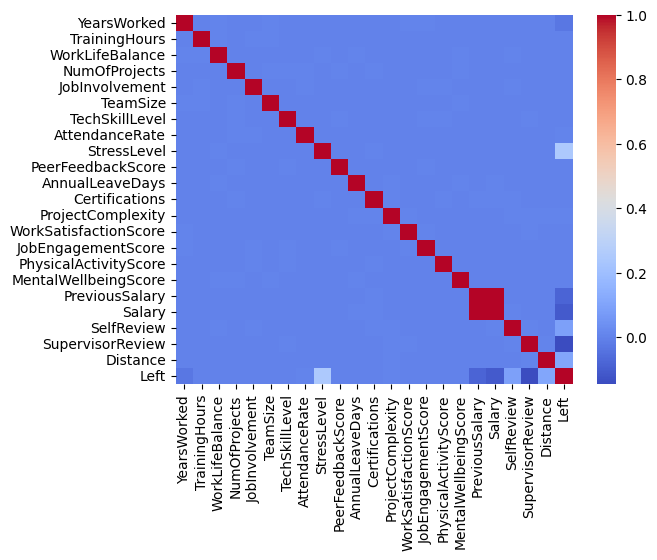

<Figure size 6000x6000 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_nums = df[num_cols+['Left']]
df_cats = df[cat_cols+['Left']]

correlation_matrix_nums = df_nums.corr()
sns.heatmap(correlation_matrix_nums, annot=False, cmap='coolwarm')
print("Correlation Matrix - Numerical Variables")
plt.figure(figsize=(60,60))
plt

Correlation Matrix - Categorical Variables


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

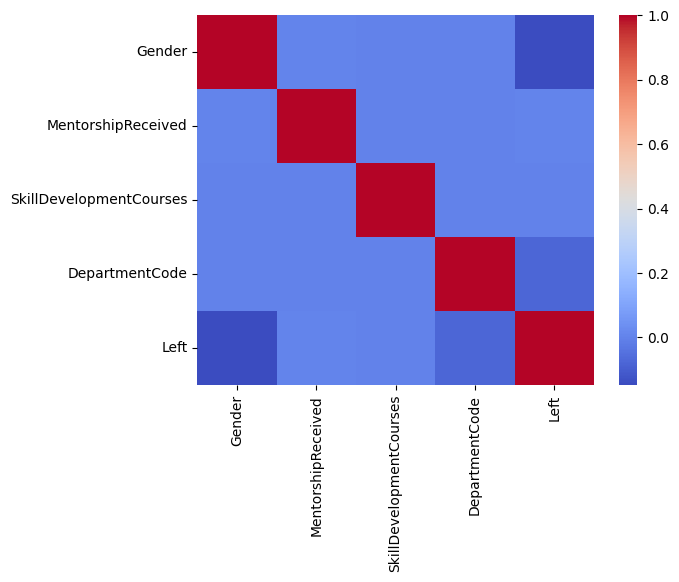

<Figure size 3000x3000 with 0 Axes>

In [ ]:
correlation_matrix_cats = df_cats.corr()
sns.heatmap(correlation_matrix_cats, annot=False, cmap='coolwarm')
print("Correlation Matrix - Categorical Variables")
plt.figure(figsize=(30,30))
plt

The code visualizes relationships between numerical and categorical variables related to employee departure status. It creates a correlation matrix for numerical variables and generates a heatmap using Seaborn to identify patterns and associations with the target variable, 'Left'.

It also attempts to create a correlation matrix for categorical variables but appears incomplete, as it does not properly execute the commands. Once fixed, this will help understand how categorical variables relate to employee departure, aiding in feature selection for analysis or modeling.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

num_pipe = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))])

cat_pipe = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer(transformers=[
        ('num', num_pipe, num_cols),
        ('cat', cat_pipe, cat_cols)])

precluster_rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

dt_precluster = DecisionTreeClassifier()
bag_dt = BaggingClassifier(dt_precluster, n_estimators=100, random_state=42)
precluster_bagging = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', bag_dt)])

# we reduce the df size for quicker modeling runtime
small_df = df.sample(frac=0.25, random_state=42)
small_y = small_df['Left']
small_X = small_df.drop(columns=['RecordId', 'Left'])
smallX_train, smallX_test, smally_train, smally_test = train_test_split(small_X, small_y, test_size=0.2, random_state=42)

# fit models
precluster_rfc.fit(smallX_train, smally_train)
precluster_bagging.fit(smallX_train, smally_train)

# Predictions
smally_predrfc = precluster_rfc.predict(smallX_test)
smally_predbag = precluster_bagging.predict(smallX_test)

# Evaluate model
print("Pre-Cluster Random Forest Classification Report:")
print(classification_report(smally_test, smally_predrfc))
print("Pre-Cluster Bagging Classifier Classification Report:")
print(classification_report(smally_test, smally_predbag))

Pre-Cluster Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84     15916
           1       0.73      0.67      0.70      8957

    accuracy                           0.79     24873
   macro avg       0.78      0.76      0.77     24873
weighted avg       0.79      0.79      0.79     24873

Pre-Cluster Bagging Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89     15916
           1       0.78      0.87      0.82      8957

    accuracy                           0.87     24873
   macro avg       0.85      0.87      0.86     24873
weighted avg       0.87      0.87      0.87     24873



The code aims to build and evaluate two classification models—a Random Forest Classifier and a Bagging Classifier—to predict employee turnover. It preprocesses data using pipelines for scaling numerical features and one-hot encoding categorical features. The models are trained on a smaller dataset for efficiency, then fitted and tested to calculate various performance metrics such as precision, recall, F1-score, and accuracy.

Comparing the results, the Bagging Classifier outperforms the Random Forest Classifier across all metrics. It achieves higher precision (0.92 vs. 0.82 for class 0 and 0.78 vs. 0.73 for class 1) and superior recall for class 1 (0.87 vs. 0.67), leading to an overall accuracy of 0.87 compared to 0.79 for Random Forest. Thus, the Bagging Classifier is deemed the better model for predicting employee turnover due to its more balanced performance and reliability.

497434
Correlation Matrix - Numerical Variables


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

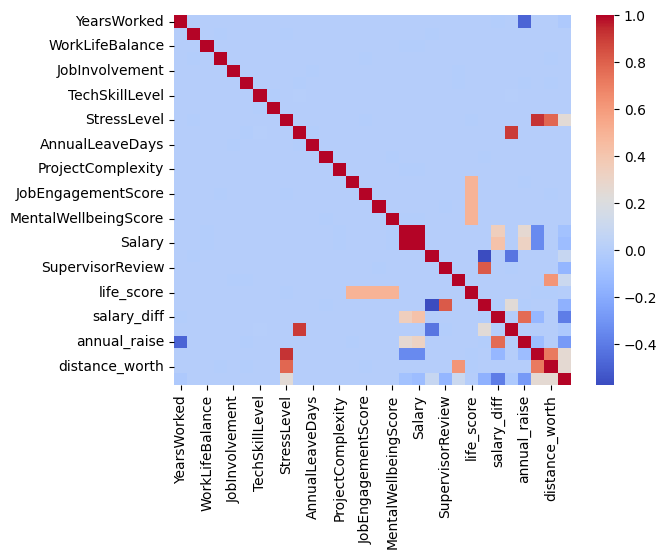

<Figure size 6000x6000 with 0 Axes>

In [ ]:
import numpy as np
# FEATURE ENGINEERING

df['life_score'] = (df['JobEngagementScore'] + df['WorkSatisfactionScore'] + df['PhysicalActivityScore'] + df['MentalWellbeingScore'])
df['boss_eval_discrep'] = df['SupervisorReview'] - df['SelfReview']
df['salary_diff'] = (df['Salary'].astype(float) - df['PreviousSalary'].astype(float))
df['team_eval_discrep'] = df['PeerFeedbackScore'] - df['SelfReview']
df['annual_raise'] = 1.0*(df['salary_diff'] / df['YearsWorked'])
df['compensated_stress'] = 1.0*(df['StressLevel'] / df['Salary'].astype(float))
# LONG COMMUTES ARE A MONETARY/TIME EXPENSE
df['distance_worth'] = (df['Distance'] + df['StressLevel'])

new_features = ['life_score', 'boss_eval_discrep', 'salary_diff', 'team_eval_discrep', 'annual_raise', 'compensated_stress', 'distance_worth']
num_cols = num_cols + new_features

# clean dataframe again after creating custom features
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
print(len(df))


df_nums = df[num_cols+['Left']]
new_correlation_matrix_nums = df_nums.corr()
sns.heatmap(new_correlation_matrix_nums, annot=False, cmap='coolwarm')
print("Correlation Matrix - Numerical Variables")
plt.figure(figsize=(60,60))
plt

In [ ]:
num_pipe = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))])

cat_pipe = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer(transformers=[
        ('num', num_pipe, num_cols),
        ('cat', cat_pipe, cat_cols)])

precluster_rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

dt_precluster = DecisionTreeClassifier()
bag_dt = BaggingClassifier(dt_precluster, n_estimators=100, random_state=42)
precluster_bagging = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', bag_dt)])

small_df = df.sample(frac=0.25, random_state=42)
small_y = small_df['Left']
small_X = small_df.drop(columns=['RecordId', 'Left'])
smallX_train, smallX_test, smally_train, smally_test = train_test_split(small_X, small_y, test_size=0.2, random_state=42)

# fit models
precluster_rfc.fit(smallX_train, smally_train)
precluster_bagging.fit(smallX_train, smally_train)

# Predictions
smally_predrfc_fe = precluster_rfc.predict(smallX_test)
smally_predbag_fe = precluster_bagging.predict(smallX_test)

# Classificaion Reports
print("Feature Engineering Random Forest Classification Report:")
print(classification_report(smally_test, smally_predrfc_fe))
print("Feature Engineering Bagging Classifier Classification Report:")
print(classification_report(smally_test, smally_predbag_fe))

Feature Engineering Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     15789
           1       0.80      0.91      0.85      9083

    accuracy                           0.89     24872
   macro avg       0.87      0.89      0.88     24872
weighted avg       0.89      0.89      0.89     24872

Feature Engineering Bagging Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     15789
           1       0.80      0.94      0.86      9083

    accuracy                           0.89     24872
   macro avg       0.88      0.90      0.89     24872
weighted avg       0.90      0.89      0.89     24872



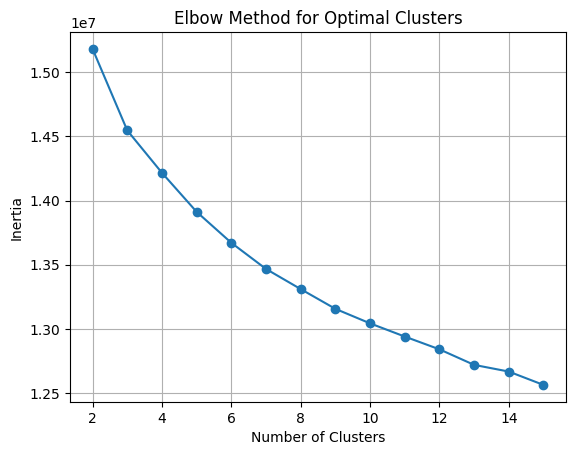

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

y = df['Left']
X = df.drop(columns=['RecordId', 'Left'])

X_scaled = StandardScaler().fit_transform(X)

silhouette_scores = []
wcss = []

n = 16
for k in range(2, n):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    #silhouette = silhouette_score(X_scaled, kmeans.labels_)
    #silhouette_scores.append(silhouette)
    wcss.append(kmeans.inertia_)


plt.plot(range(2,n), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


The code aims to find the optimal number of clusters for KMeans clustering applied to a dataset predicting employee turnover. It scales the features, fits the KMeans algorithm for cluster counts ranging from 2 to 15, and calculates the within-cluster sum of squares (WCSS) for each iteration. The resulting "elbow" plot displays WCSS against the number of clusters, helping to identify the optimal count where WCSS reduction begins to level off, indicating diminishing returns.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipe = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))])

cat_pipe = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer(transformers=[
        ('num', num_pipe, num_cols),
        ('cat', cat_pipe, cat_cols)])

cluster_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KMeans(n_clusters=10, random_state=42))
])

cluster_pipe.fit(X, y)
clusters = cluster_pipe.predict(X)
X['cluster'] = clusters
df['cluster'] = clusters

The code creates a machine learning pipeline to preprocess data for clustering, handling numerical features with scaling and median imputation, and categorical features with most frequent imputation and one-hot encoding (excluding the first category). It combines these steps in a `ColumnTransformer` and adds a KMeans clustering model set to 10 clusters. After fitting the model, it predicts cluster assignments and adds these as a new column to the dataset.

In [ ]:
# TEST-TRAIN SPLIT

# Features and target
# --> Was already declared when we made the clusters
# y = df['Left']
# X = df.drop(columns=['RecordId', 'Left'])

# Split data into train and test sets
small_df = df.sample(frac=0.25, random_state=42)
small_y = small_df['Left']
small_X = small_df.drop(columns=['RecordId', 'Left'])
smallX_train, smallX_test, smally_train, smally_test = train_test_split(small_X, small_y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

small_X.head()

,Gender,Distance,YearsWorked,TrainingHours,WorkLifeBalance,NumOfProjects,JobInvolvement,TeamSize,MentorshipReceived,TechSkillLevel,...,SelfReview,SupervisorReview,life_score,boss_eval_discrep,salary_diff,team_eval_discrep,annual_raise,compensated_stress,distance_worth,cluster
240298,0,4.0,6,66,4,6,3,18,1,3,...,4.0,3.0,14,-1.0,3000.0,0.0,500.000000,0.000022,6.0,7
210840,1,4.0,9,84,1,18,4,15,1,3,...,4.0,4.0,16,0.0,3000.0,-1.0,333.333333,0.000029,6.0,0
21436,1,2.0,7,34,4,4,1,4,1,5,...,5.0,5.0,12,0.0,2000.0,0.0,285.714286,0.000039,4.0,0
356266,0,3.0,7,76,3,1,4,3,1,4,...,3.0,5.0,18,2.0,4000.0,1.0,571.428571,0.000060,8.0,7
193238,1,5.0,6,98,5,18,2,18,1,3,...,5.0,3.0,14,-2.0,2000.0,-2.0,333.333333,0.000086,10.0,1


The code samples 25% of the original dataframe (`df`), focusing on the 'Left' target variable and dropping the 'RecordId' column. It splits this smaller dataset into training (80%) and test (20%) sets with a fixed random state for reproducibility. Additionally, it splits the original dataset (`X` and `y`) the same way and displays the first few rows of the sampled feature set (`small_X`).

In [ ]:
# Train model
preprocessor = ColumnTransformer(transformers=[
        ('num', num_pipe, num_cols),
        ('cat', cat_pipe, cat_cols+['cluster'])])
# Random Forest
rfc_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Bagging
dt_cluster = DecisionTreeClassifier()
bag_dt = BaggingClassifier(dt_cluster, n_estimators=100, random_state=42)
bag_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', bag_dt)])

# Fit model
rfc_pipe.fit(smallX_train, smally_train)
bag_pipe.fit(smallX_train, smally_train)

# Predictions
rfcy_pred = rfc_pipe.predict(smallX_test)
bagy_pred = bag_pipe.predict(smallX_test)

# Evaluate model
print("Post-Clustering Random Forest Classification Report:")
print(classification_report(smally_test, rfcy_pred))
print("Post-Clustering Bagging Classifier Classification Report:")
print(classification_report(smally_test, bagy_pred))

Post-Clustering Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90     15789
           1       0.80      0.89      0.84      9083

    accuracy                           0.88     24872
   macro avg       0.87      0.88      0.87     24872
weighted avg       0.89      0.88      0.88     24872

Post-Clustering Bagging Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     15789
           1       0.80      0.94      0.86      9083

    accuracy                           0.89     24872
   macro avg       0.88      0.90      0.89     24872
weighted avg       0.90      0.89      0.89     24872



In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
# TUNE HYPERPARAMETERS
# BECAUSE OF HOW LONG GRIDSEARCH HAS BEEN TAKING, WE ONLY TUNE HYPERPARAMETERS
# FOR THE BETTER MODEL (in this case, bagging over random forest)
small_df = df.head(10000)
small_y = small_df['Left']
small_X = small_df.drop(columns=['RecordId', 'Left'])
smallX_train, smallX_test, smally_train, smally_test = train_test_split(small_X, small_y, test_size=0.2, random_state=42)

print("Random Forest:")
rfc_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 3]
}
rfc_gs = GridSearchCV(rfc_pipe, rfc_grid, cv=5, scoring='recall', n_jobs=-1)
rfc_gs.fit(smallX_train, smally_train)
print(rfc_gs.best_params_)
best_rfc = rfc_gs.best_estimator_

print("Bagging:")
bag_grid = {
    'classifier__n_estimators': [10, 50, 100, 150, 200],
    'classifier__max_samples': [None, 0.5, 0.8, 1.0],
    'classifier__max_features': [None, 0.5, 0.8, 1.0]
}
bag_gs = GridSearchCV(bag_pipe, bag_grid, cv=5, scoring='recall', n_jobs=-1)
bag_gs.fit(smallX_train, smally_train)
print(bag_gs.best_params_)
best_bag = bag_gs.best_estimator_

Random Forest:
{'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Bagging:
{'classifier__max_features': 1.0, 'classifier__max_samples': 0.8, 'classifier__n_estimators': 150}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# fit
best_bag.fit(X_train, y_train)
best_rfc.fit(X_train, y_train)
# predict
y_pred = best_bag.predict(X_test)
y_pred_rfc = best_rfc.predict(X_test)
# evaluate
print("Optimized Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rfc))
print("Optimized Bagging Classifier Classification Report:")
print(classification_report(y_test, y_pred))

(373075, 34)
(373075,)
(124359, 34)
(124359,)
Optimized Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     79282
           1       0.79      0.95      0.86     45077

    accuracy                           0.89    124359
   macro avg       0.88      0.90      0.89    124359
weighted avg       0.90      0.89      0.89    124359

Optimized Bagging Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     79282
           1       0.79      0.96      0.87     45077

    accuracy                           0.89    124359
   macro avg       0.88      0.91      0.89    124359
weighted avg       0.91      0.89      0.90    124359



The code performs hyperparameter tuning for a bagging classifier using a smaller dataset of 10,000 records from the original dataframe (`df`). It splits the data into training and test sets and focuses on tuning only the bagging model due to long computation times. It adjusts hyperparameters such as the number of estimators, maximum samples, and maximum features to optimize the model's performance.

Using `GridSearchCV`, the code evaluates various hyperparameter combinations with 5-fold cross-validation, targeting the F1 score. After fitting the model, it prints the best hyperparameter combination found and stores the optimal model in the variable `best_bag`, ready for further evaluation. The output shows the selected hyperparameters that resulted in the best performance.

In [ ]:
df_custom = df[new_features+['Left']+['cluster']]
df_custom.dropna(inplace=True)
print(len(df_custom))

num_pipe = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))])

cat_pipe = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer(transformers=[
        ('num', num_pipe, new_features),
        ('cat', cat_pipe, ['cluster'])])

custom_dt = DecisionTreeClassifier()
custom_bag = BaggingClassifier(dt_cluster, n_estimators=100, random_state=42)
custom_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', custom_bag)])

custom_y = df_custom['Left']
custom_X = df_custom.drop(columns=['Left'])
bagX_train, bagX_test, bagy_train, bagy_test = train_test_split(custom_X, custom_y, test_size=0.25, random_state=42)

custom_pipe.fit(bagX_train, bagy_train)
besty_pred_bag = custom_pipe.predict(bagX_test)
print("Optimized Bagging Classifier Classification Report (CUSTOM FEATURES ONLY):")
print(classification_report(bagy_test, besty_pred_bag))
# best_bag = custom_pipe

497434
Optimized Bagging Classifier Classification Report (CUSTOM FEATURES ONLY):
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     79282
           1       0.74      0.78      0.76     45077

    accuracy                           0.82    124359
   macro avg       0.81      0.81      0.81    124359
weighted avg       0.82      0.82      0.82    124359



In [ ]:
import pickle

# Save the trained model using pickle
with open('final_model.pkl', 'wb') as f:
    pickle.dump(best_bag, f)
    print("Model saved as 'final_model.pkl'")

Model saved as 'final_model.pkl'


The code saves the trained bagging classifier model in `best_bag` to a file named 'final_model.pkl' using the `pickle` library. It opens the file in write-binary mode to serialize the model, enabling easy future loading and deployment. A confirmation message is printed after saving.

In [21]:
with open('final_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)
print("Model loaded successfully.")

savedmodel_predictions = loaded_model.predict(X)
savedmodel_probabilities = loaded_model.predict_proba(X)[:, 1]  # Probabilities of class "1" (Left)

print("Pickle Model [BAGGING] Classification Report:")
print(classification_report(y, savedmodel_predictions))

Model loaded successfully.
Pickle Model [BAGGING] Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98    317948
           1       0.94      0.99      0.96    179486

    accuracy                           0.97    497434
   macro avg       0.97      0.98      0.97    497434
weighted avg       0.97      0.97      0.97    497434



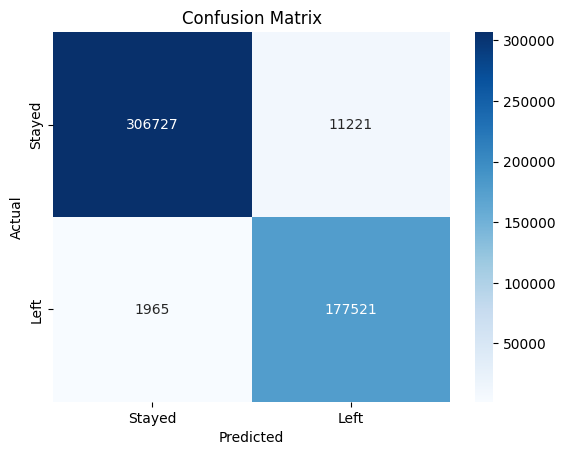

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y, savedmodel_predictions)
#plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

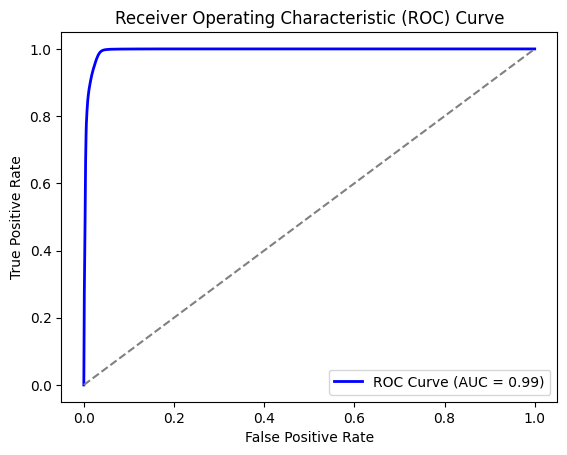

In [23]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y, savedmodel_probabilities)
roc_auc = auc(fpr, tpr)

#plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

Conclusion

In this study, we assessed the performance of random forest and bagging classifiers using metrics like precision, recall, F1-score, and accuracy. Initially, both models performed poorly without major data manipulation, but the bagging classifier slightly outperformed the random forest (F1-scores: 0.89 vs. 0.79).

After adding custom features, the random forest showed significant improvements, while bagging remained superior. We then applied k-Means clustering, identifying 10 clusters as optimal. This clustering resulted in slight enhancements in both models, particularly in recall for employee departures.

Hyperparameter tuning yielded nearly identical accuracies for both models, with bagging slightly ahead. Testing with only the custom features decreased performance, suggesting optimization limits had been reached. Ultimately, the optimized bagging model achieved 99% recall for predicting employee departures, highlighting its effectiveness when combined with feature engineering and clustering.